# LL Surfaces

---

Aditya Marathe

**Aims**:

- Understand how PyOscCalc works...
    - *My understanding*: It simulates matter effects on oscillation prob.
- Calculate LL for our data...

Useful equations for an oscillation fit:

$$
    \text{ln}\mathscr{L} = - \sum_{i=1}^N \left( \text{P}_i(\text{Osc. Params.}) - \text{O}_i + \text{O}_i \times \text{ln} \frac{\text{O}_i}{\text{P}_i(\text{Osc. Params.})} \right)
$$

$$
    \chi^2 = - 2 \text{ln} \mathscr{L}
$$

where $\text{P}_i(\text{Osc. Params.})$ is the predicted energy distribution calculated by passing the possible oscillation parameters to an oscillation calculator (PyOscCalc) and $\text{O}_i$ is the observed energy distribution from the experiment.

What are the oscillation parameters are we fitting for?

- $\text{sin}^2 \theta_{23}$
- $\Delta m_{31}^2$
- $\delta_\text{CP}$

Stuff we cannot fit, so we just constrain them...

- $\text{sin}^2 \theta_{12} = 0.307$
- $\text{sin}^2 \theta_{13} = 0.0210 \pm 0.0011$
- $\Delta m_{21}^2 = 7.53 \times 10^{-5} \;\; \text{eV}^2$


## Imports

In [2]:
%matplotlib inline

import numpy as np

import pandas as pd

from matplotlib import pyplot as plt

In [3]:
import sys

sys.path.insert(1, './../../pyosccalc/')
sys.path.insert(1, './../')

In [4]:
import ana
from utils import *
from cuts import *

In [5]:
from OscCalc import OscCalc
from FluxTools import FluxTools, LogNormalFlux
from FitTools import FitTools

## LL (Example)

In [13]:
osccalc = OscCalc()

In [14]:
# Calculating the oscillation probabilities...
# A small delta was added to the bin values to prevent a ZeroDivisionError

bins = np.linspace(0.1, 5, 10_000)

mu_survival = np.asarray(
    [osccalc.MuToMu(energy) for energy in bins]
)
e_appearance = np.asarray(
    [osccalc.MuToElec(energy) for energy in bins]
)
tau_appearance = np.asarray(
    [osccalc.MuToTau(energy) for energy in bins]
)

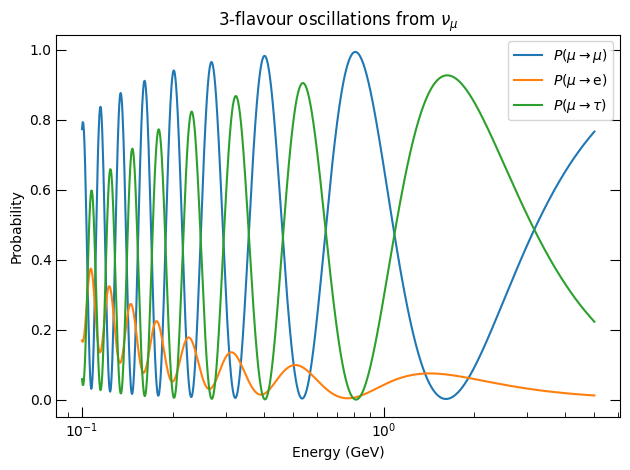

In [15]:
fig, ax = custom_subplots()

ax.plot(bins, mu_survival, label=r'$P(\mu\rightarrow\mu)$')
ax.plot(bins, e_appearance, label=r'$P(\mu\rightarrow\text{e})$')
ax.plot(bins, tau_appearance, label=r'$P(\mu\rightarrow\tau)$')

ax.legend()

ax.set_xscale('log')

ax.set_title(r'3-flavour oscillations from $\nu_\mu$')
ax.set_xlabel('Energy (GeV)')
ax.set_ylabel('Probability')

plt.tight_layout();

In [16]:
fluxtools = FluxTools()
lognormflux = LogNormalFlux(shape=0.2, scale=2.2)

pdf = fluxtools.pdfwrap(lognormflux)

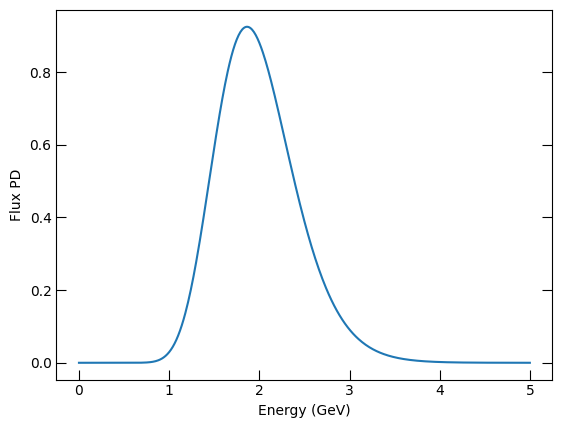

In [17]:
fig, ax = custom_subplots()

bins = np.linspace(0, 5, pdf.shape[0])

ax.plot(bins, pdf)

ax.set_xlabel('Energy (GeV)')
ax.set_ylabel('Flux PD');

In [18]:
# Create an experiment
bin_weights = fluxtools.getNuMuAsimov(flux=lognormflux, osccalc=osccalc)
bin_edges = fluxtools.binEdges

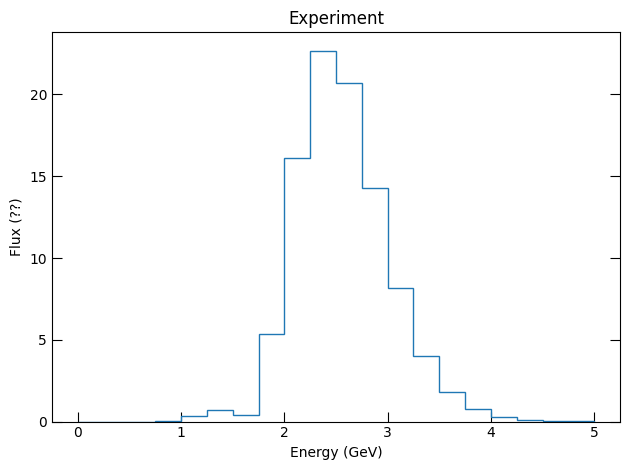

In [19]:
fig, ax = custom_subplots()

ax.hist(bin_edges[:-1], bin_edges, weights=bin_weights, histtype='step')

ax.set_title('Experiment')
ax.set_xlabel('Energy (GeV)')
ax.set_ylabel('Flux (??)')

plt.tight_layout();

In [20]:
# Experiments in a bunch of fake universes...
exp_universes = [
    fluxtools.genNuMuExperiment(lognormflux, osccalc) for _ in range(10_000)
]

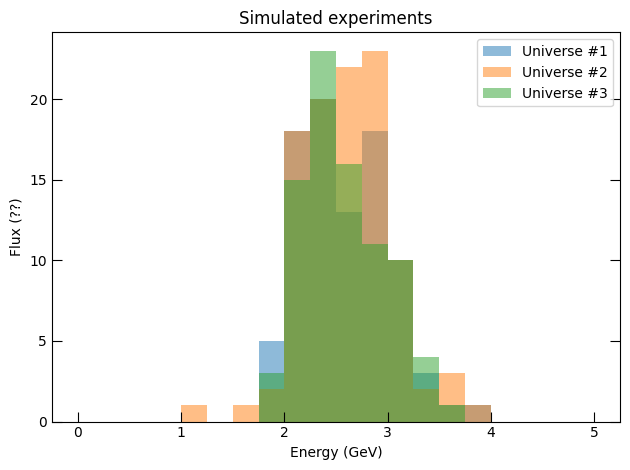

In [21]:
fig, ax = custom_subplots()

for i, exp_universe in enumerate(exp_universes[:3]):
    ax.hist(
        bin_edges[:-1], 
        bin_edges, 
        weights=exp_universe, 
        alpha=0.5,
        label=f'Universe #{i + 1}'
    )

ax.legend()

ax.set_title('Simulated experiments')
ax.set_xlabel('Energy (GeV)')
ax.set_ylabel('Flux (??)')

plt.tight_layout();

In [22]:
# Possible osc. parameters in the neutrino oscillation multi-verse (TM)...

d_m32_array = np.linspace(2.2E-3, 2.6E-3, 20)
sin_sq_23_array = np.linspace(0.35, 0.65, 20)
d_cp_array = np.linspace(0, 2 * np.pi, 20)

# d_m32_array = np.linspace(2.0E-3, 2.8E-3, 20)
# sin_sq_23_array = np.linspace(0.25, 0.75, 20)
# d_cp_array = np.linspace(0, 2 * np.pi, 20)

In [23]:
# asimov_array = fluxtools.makeNuMuAsimovArray(
#     lognormflux, 
#     osccalc,
#     d_m32_array,
#     sin_sq_23_array,
#     d_cp_array
# )

In [25]:
# mu_ll_array_test = [
#     [
#         [
#             FitTools.getPoissonLL(asimov, bin_weights) for asimov in asimov_row
#         ] for asimov_row in asimov_mat
#     ] for asimov_mat in asimov_array
# ]

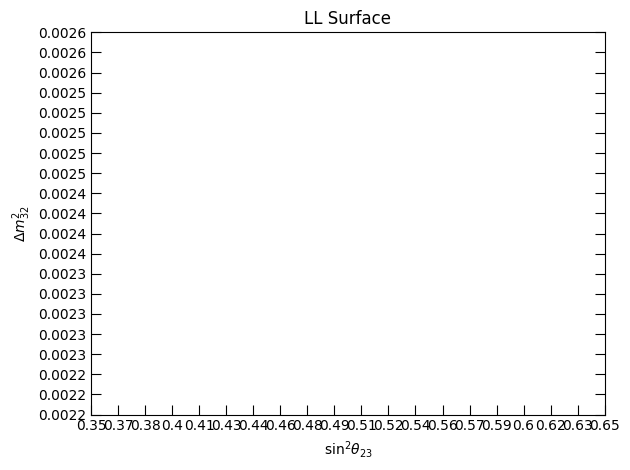

In [26]:
fig, ax = custom_subplots()

# image = ax.imshow(FitTools.profile3Dto2D(mu_ll_array_test, [2, 1]), cmap='cool')
# colourbar = fig.colorbar(image)

ax.set_xticks(range(sin_sq_23_array.shape[0]))
ax.set_yticks(range(d_m32_array.shape[0]))

ax.set_xticklabels(np.round(sin_sq_23_array, 2))
ax.set_yticklabels(np.round(d_m32_array, 4))

ax.set_title('LL Surface')
ax.set_xlabel(r'$\text{sin}^2 \theta_{23}$')
ax.set_ylabel(r'$\Delta m_{32}^2$')

plt.tight_layout();

## LL Current cuts

In [6]:
ds = Datasets()

Datasets | Found the following: MINI_DATA_DIR, DATA_V2_DIR, DATA_V3_DIR, REALLY_MINI_DIR, COPYMERGED_C6_DIR, COPYMERGED_C7_DIR, COPYMERGED_C8_DIR, COPYMERGED_C9_DIR, COPYMERGED_C10_DIR


In [7]:
data = ana.NOvAData.init_from_copymerge_h5(
    h5dirs=[
        ds.COPYMERGED_C8_DIR,  # type: ignore
        ds.COPYMERGED_C9_DIR,  # type: ignore
        ds.COPYMERGED_C10_DIR  # type: ignore
    ]
)

NOvAData | Loading tables from CM HDF5 files...


NOvAData | Loaded table from CM HDF5 files (1 / 3).
NOvAData | Loaded table from CM HDF5 files (2 / 3).
NOvAData | Loaded table from CM HDF5 files (3 / 3).
NOvAData | Initialised.


In [8]:
from utils import *

In [9]:
from transforms import *

In [10]:
cuts = ana.Cuts.init_nova_cuts()

In [11]:
full_cut_table = cuts.apply_all_cuts(data.table)

Cuts     | Applied 'Detector Quality' cut (480_160 -> 401_900 events).
Cuts     | Applied 'Data Quality' cut (401_900 -> 401_891 events).
Cuts     | Applied 'CVN PID Score' cut (401_891 -> 91_605 events).
Cuts     | Applied 'Containment' cut (91_605 -> 42_160 events).
Cuts     | Applied 'Cosmic Rej.' cut (42_160 -> 41_327 events).
Cuts     | Applied 'Veto' cut (41_327 -> 41_239 events).


In [12]:
# Stuff calculated by the spectrum class
values_true, edges_true = np.histogram(
    data.table[data.table['rec.mc.nu.E'] > 0]['rec.mc.nu.E'],
    bins=np.linspace(0, 10, 100 + 1)
)
values_exp, edges_exp = np.histogram(
    full_cut_table['rec.energy.numu.lstmnu'],
    bins=np.linspace(0, 10, 100 + 1)
)
cent_true = (edges_true[:-1] + edges_true[1:]) / 2
cent_exp = (edges_exp[:-1] + edges_exp[1:]) / 2

# New exp.
fail_cont_table = cuts.apply_all_cuts(
    data.table, 
    except_=['Containment', 'CVN PID Score']
)
fail_cont_table = cuts.apply_cut('Containment', fail_cont_table, passed=False)
fail_cont_table = cuts.apply_cut('CVN PID Score', fail_cont_table, passed=False)
new_e_table = pd.concat(
    [
        fail_cont_table[fail_cont_table['rec.mc.nu.E'] > 0]['rec.mc.nu.E'],
        full_cut_table['rec.energy.numu.lstmnu']
    ]
)
new_values_exp, new_edges_exp = np.histogram(
    new_e_table,
    bins=np.linspace(0, 10, 100 + 1)
)
new_cent_exp = (new_edges_exp[:-1] + new_edges_exp[1:]) / 2

Cuts     | Applied 'Detector Quality' cut (480_160 -> 401_900 events).
Cuts     | Applied 'Data Quality' cut (401_900 -> 401_891 events).
Cuts     | Applied 'Cosmic Rej.' cut (401_891 -> 149_666 events).
Cuts     | Applied 'Veto' cut (149_666 -> 135_451 events).
Cuts     | Applied 'Containment' cut (135_451 -> 68_180 events).
Cuts     | Applied 'CVN PID Score' cut (68_180 -> 24_857 events).


In [13]:
df = load_nova_sample(ds.REALLY_MINI_DIR, n_events=20_000_000)

C:\Users\Shrey\AppData\Local\Temp\ipykernel_22352\2375184540.py:1: DeprecationWarning: Function `load_nova_sample` has been deprecated, use the `NOvAData` class from 'data.py' instead!
  df = load_nova_sample(ds.REALLY_MINI_DIR, n_events=20_000_000)


In [14]:
# Stuff calculated by the spectrum class
values_true, edges_true = np.histogram(
    df[df['trueEnu'] > 0]['trueEnu'],
    bins=np.linspace(0, 10, 100 + 1)
)
values_exp, edges_exp = np.histogram(
    df[df['numufull'] > 0]['rec.energy.numu.lstmnu'],
    bins=np.linspace(0, 10, 100 + 1)
)
cent_true = (edges_true[:-1] + edges_true[1:]) / 2
cent_exp = (edges_exp[:-1] + edges_exp[1:]) / 2

# New exp.
df_f = df[
    (df['numuBasicQuality'] > 0)
    & (df['numucosrej'] > 0)
    & (df['3flavourveto'] > 0)
    & (df['numuQuality'] > 0)
    & (df['numu2020pid'] < 1)
    & (df['numucontain'] < 1)
]
new_e_table = pd.concat(
    [
        df_f[df_f['trueEnu'] > 0]['trueEnu'],
        df[df['numufull'] > 0]['rec.energy.numu.lstmnu']
    ]
)
new_values_exp, new_edges_exp = np.histogram(
    new_e_table,
    bins=np.linspace(0, 10, 100 + 1)
)
new_cent_exp = (new_edges_exp[:-1] + new_edges_exp[1:]) / 2

In [40]:
def flux_gen(fx, fy):  
    class Flux:  
        def flux(self, x):
            return np.interp(
                x=x,
                xp=fx,
                fp=fy,
                left=0,
                right=0
            )
    
    return Flux()


def get_flux_n_weights(
        energy,
        sinSqTheta12=0.307,
        sinSqTheta13=0.0218,
        sinSqTheta23=0.536,
        deltamSq21=7.53e-5,
        deltamSq32=2.444e-3,
        dcp=np.pi / 2  # 1.37 * np.pi
    ):
    # Spectrum
    counts, edges = np.histogram(energy, bins=np.linspace(0, 10, 100 + 1))
    cent = (edges[:-1] + edges[1:]) / 2

    # Flux
    flux = flux_gen(cent, counts)

    # OscCalc
    osccalc = OscCalc(
        sinSqTheta12=sinSqTheta12,
        sinSqTheta13=sinSqTheta13,
        sinSqTheta23=sinSqTheta23,
        deltamSq21=deltamSq21,
        deltamSq32=deltamSq32,
        dcp=dcp,

        density=2.7,
        L=811,

        isAntiNu=+1  # Set to neutrino
    )

    # Bin weights
    bin_weights = fluxtools.getNuMuAsimov(
        flux=flux,
        osccalc=osccalc,
        force=True
    )

    return bin_weights, flux


d_m32 = np.linspace(2.2E-3, 2.7E-3, 20)
sin_sq_23 = np.linspace(0.2, 0.7, 30)
d_cp = np.linspace(0, 2 * np.pi, 30)


def get_asimov_array(
        true_bin_weights,
        d_m32=d_m32,
        sin_sq_23=sin_sq_23,
        d_cp=d_cp
    ):
    osccalc = OscCalc(
        sinSqTheta12=0.307,
        sinSqTheta13=0.0218,
        sinSqTheta23=0.536,
        deltamSq21=7.53e-5,
        deltamSq32=2.444e-3,
        dcp=np.pi / 2, # 1.37 * np.pi,

        density=2.7,
        L=811,
        
        isAntiNu=+1  # Set to neutrino
    )
    
    return fluxtools.makeNuMuAsimovArray(
        true_bin_weights,
        osccalc,
        d_m32,
        sin_sq_23,
        d_cp
    )


def ll_surface(bin_weights, asimov_array):
    
    l_array = [
        [
            [
                FitTools.getPoissonLL(asimov, bin_weights) for asimov in row
            ] for row in mat
        ] for mat in asimov_array
    ]

    return l_array


In [34]:
true_bin_weights, true_flux = get_flux_n_weights(
    energy=df[df['trueEnu'] > 0]['trueEnu']
)
exp_bin_weights, _ = get_flux_n_weights(
    energy=df[df['numufull'] > 0]['rec.energy.numu.lstmnu']
)
new_exp_bin_weights, _ = get_flux_n_weights(
    energy=new_e_table
)

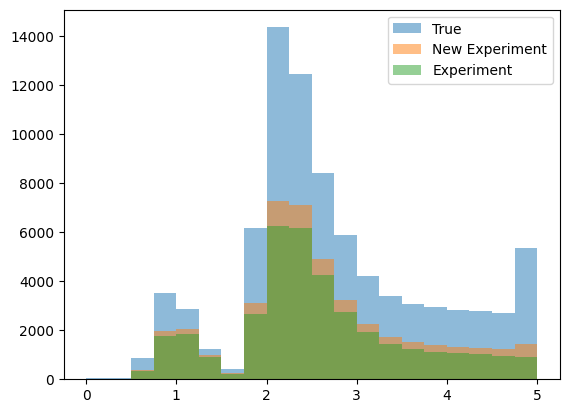

In [35]:
ft = FluxTools()

_a = {
    'True': true_bin_weights,
    'New Experiment': new_exp_bin_weights,
    'Experiment': exp_bin_weights,
}

for label, weights in _a.items():

    plt.hist(
        ft.binEdges[:-1],
        bins=ft.binEdges,
        weights=weights,
        alpha=0.5,
        label=label
    )

plt.legend();

In [36]:
asimov_array = get_asimov_array(true_flux)

In [49]:
exp_ll = ll_surface(exp_bin_weights, asimov_array)
new_exp_ll = ll_surface(new_exp_bin_weights, asimov_array)
truth_ll = ll_surface(true_bin_weights, asimov_array)

In [52]:
dcpLLArray_exp = FitTools.profile3Dto1D(exp_ll, 0)
sinLLArray_exp = FitTools.profile3Dto1D(exp_ll, 1)
dmLLArray_exp = FitTools.profile3Dto1D(exp_ll, 2)

dcpLLArray_new_exp = FitTools.profile3Dto1D(new_exp_ll, 0)
sinLLArray_new_exp = FitTools.profile3Dto1D(new_exp_ll, 1)
dmLLArray_new_exp = FitTools.profile3Dto1D(new_exp_ll, 2)

dcpLLArray_truth = FitTools.profile3Dto1D(truth_ll, 0)
sinLLArray_truth = FitTools.profile3Dto1D(truth_ll, 1)
dmLLArray_truth = FitTools.profile3Dto1D(truth_ll, 2);

(0, 1, 2)
(1, 2, 0)
(2, 0, 1)
(0, 1, 2)
(1, 2, 0)
(2, 0, 1)
(0, 1, 2)
(1, 2, 0)
(2, 0, 1)


## LL Current Cuts (Plots)

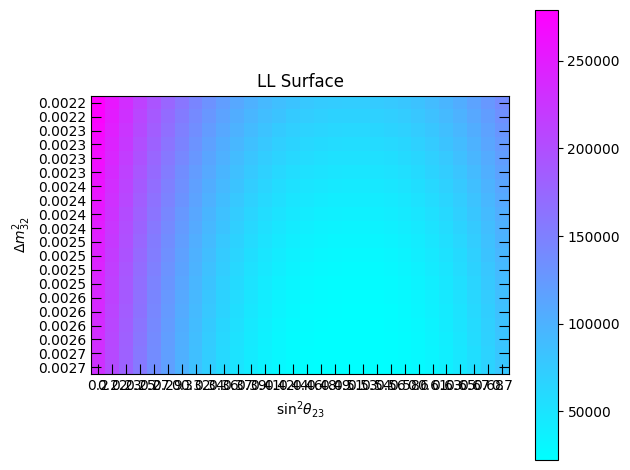

In [41]:
fig, ax = custom_subplots()

image = ax.imshow(FitTools.profile3Dto2D(exp_ll, [2, 1]), cmap='cool')
colourbar = fig.colorbar(image)

ax.set_xticks(range(sin_sq_23.shape[0]))
ax.set_yticks(range(d_m32.shape[0]))

ax.set_xticklabels(np.round(sin_sq_23, 2))
ax.set_yticklabels(np.round(d_m32, 4))

ax.set_title('LL Surface')
ax.set_xlabel(r'$\text{sin}^2 \theta_{23}$')
ax.set_ylabel(r'$\Delta m_{32}^2$')

plt.tight_layout();

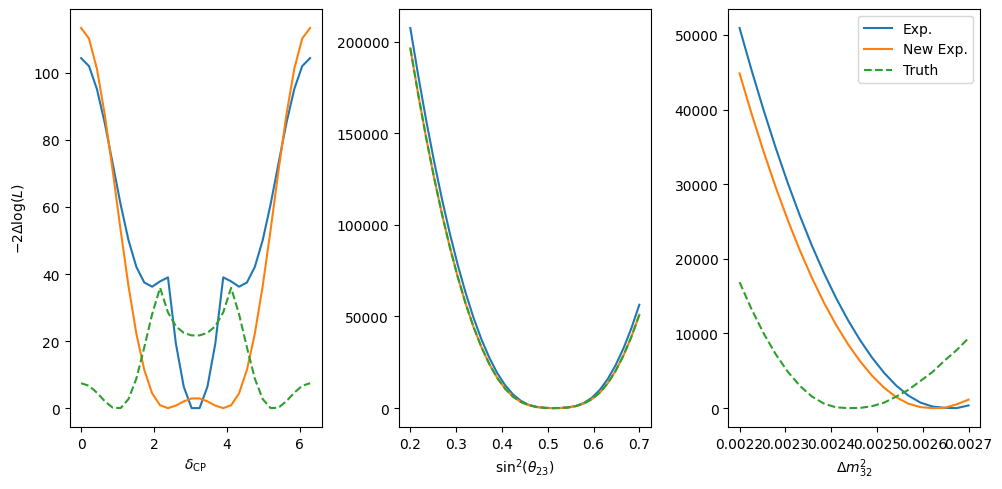

In [53]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

axs[0].plot(d_cp, dcpLLArray_exp - min(dcpLLArray_exp), label='Exp.')
axs[0].plot(d_cp, dcpLLArray_new_exp - min(dcpLLArray_new_exp), label='New Exp.')
axs[0].plot(d_cp, dcpLLArray_truth - min(dcpLLArray_truth), '--', label='Truth')
axs[0].set_ylabel(r'$-2 \Delta \text{log}(L)$')
axs[0].set_xlabel(r'$\delta_\text{CP}$')

axs[1].plot(sin_sq_23, sinLLArray_exp - min(sinLLArray_exp), label='Exp.')
axs[1].plot(sin_sq_23, sinLLArray_new_exp - min(sinLLArray_new_exp), label='New Exp.')
axs[1].plot(sin_sq_23, sinLLArray_new_exp - min(sinLLArray_new_exp), '--', label='Truth')
axs[1].set_xlabel(r'$\text{sin}^2(\theta_{23})$')

axs[2].plot(d_m32, dmLLArray_exp - min(dmLLArray_exp), label='Exp.')
axs[2].plot(d_m32, dmLLArray_new_exp - min(dmLLArray_new_exp), label='New Exp.')
axs[2].plot(d_m32, dmLLArray_truth - min(dmLLArray_truth), '--', label='Truth')
axs[2].set_xlabel(r'$\Delta m_{32}^2$')

axs[2].legend()

plt.tight_layout();